# 연습문제

다음은 대한민국 영화 중에서 관객 수가 가장 많은 상위 8개 데이터입니다.
주어진 코드를 이용하여 퀴즈를 풀어보시오.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['font.family'] = 'Malgun Gothic' # Windows
#matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac
matplotlib.rcParams['font.size'] = 15 # 글자크기 지정
matplotlib.rcParams['axes.unicode_minus'] = False # 한글 폰트를 사용시, 마이너스 글자가 깨지는 현상을 해결

data = {
    '영화': ['명량', '극한직업', '신과함께-죄와 벌', '국제시장', '괴물', '도둑들', '7번방의 선물', '암살'],
    '개봉 연도': [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
    '관객 수': [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270],
    '평점': [8.88, 9.20, 8.73, 9.16, 8.62, 7.64, 8.83, 9.10]
}
df = pd.DataFrame(data)
df

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께-죄와 벌,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번방의 선물,2013,1281,8.83
7,암살,2015,1270,9.10


## 1. 영화 데이터를 활용하여 X축은 영화, Y축은 평점인 막대 그래프를 그리시오.

<BarContainer object of 8 artists>

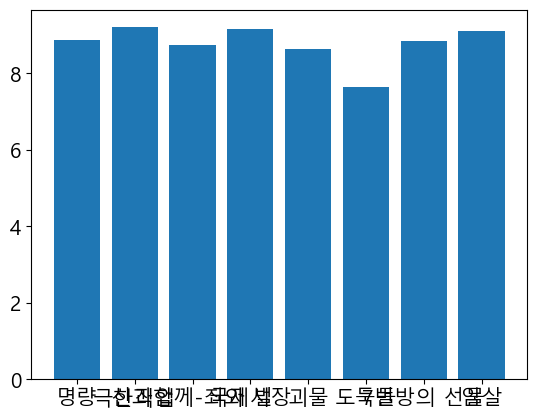

In [38]:
plt.bar(df['영화'], df['평점'])

## 2. 앞에서 만든 막대 그래프에 제시된 세부 사항을 적용하시오.

- 제목 : 국내 Top 8 영화 평점 정보
- x축 label : 영화(90도 회전)
- y축 label : 평점

Text(0, 0.5, '평점')

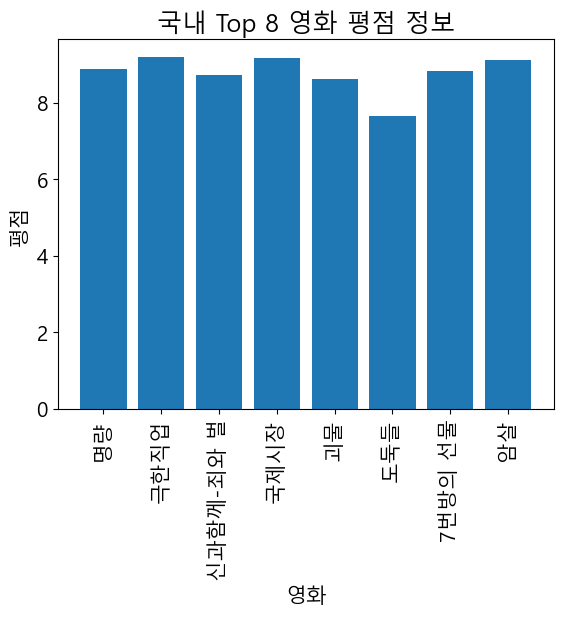

In [88]:
plt.bar(df['영화'], df['평점'])
plt.title('국내 Top 8 영화 평점 정보')
plt.xlabel('영화')
plt.xticks(rotation=90)
plt.ylabel('평점')
plt.show()

## 3. 개봉 연도별 평점 변화 추이를 꺽은 선 그래프로 그리시오.

연도별 평균 데이터를 구한 뒤 그래프 그리기

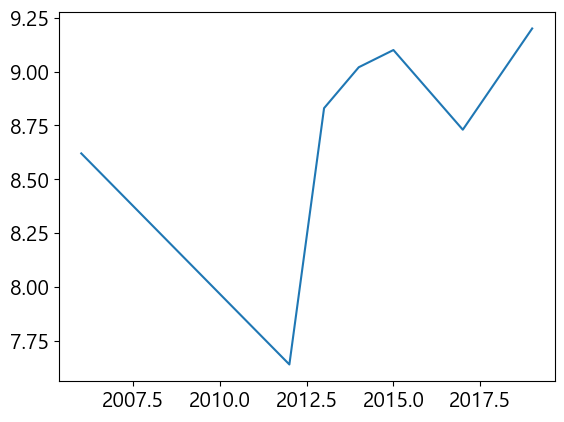

In [31]:
data = df.groupby('개봉 연도')['평점'].mean()
ndf = pd.DataFrame(data)

plt.plot(ndf.index, ndf['평점'])

## 4. 앞에서 만든 그래프에 제시된 세부사항을 적용하시오.

- marker : 'o'
- x 축 눈금 : 5년 단위 (2005, 2010, 2015 ... )
- y 축 범위 : 최소 7, 최대 10

(7.0, 10.0)

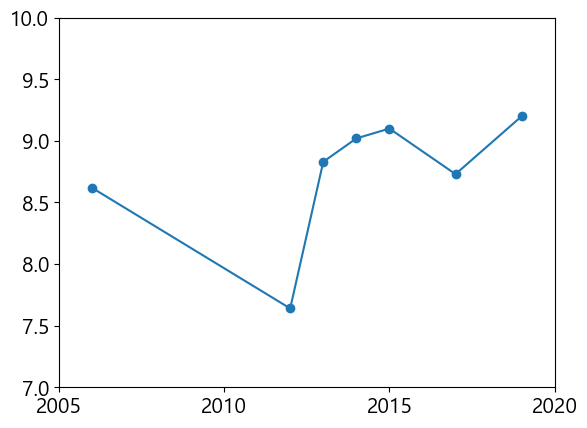

In [37]:
plt.plot(ndf.index, ndf['평점'], marker='o')
plt.xticks([2005,2010,2015,2020])
plt.ylim(7,10)

## 5. 평점이 9점 이상인 영화의 비율을 확인할 수 있는 원 그래프를 제시된 세부 사항을 적용하여 그리시오.

- label : 9점 이상 / 9점 미만
- 퍼센트 : 소수점 첫째자리까지 표시
- 범례 : 그래프 우측에 표시, 제목은 '범례'로 표시
- 간격 띄우기 : 0.02

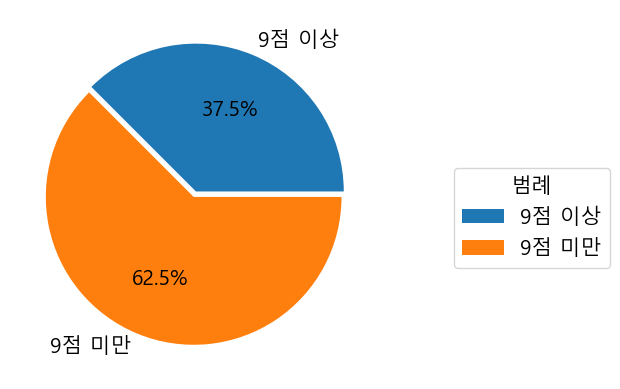

In [93]:
filt = (df['평점']>=9)
# values=[3/8, 5/8]
values=[len(df[filt]),len(df[-filt])]
labels=['9점 이상', '9점 미만']
explode=[0.02, 0.02]

plt.pie(values, labels=labels, explode=explode, autopct="%.1f%%")
plt.legend(loc=(1.2, 0.3), title='범례')

## 6. X축은 관객 수, Y축은 평점인 산점도 그래프를 그리시오.

- x축의 label : 관객 수
- y축의 label : 평점

Text(0, 0.5, '평점')

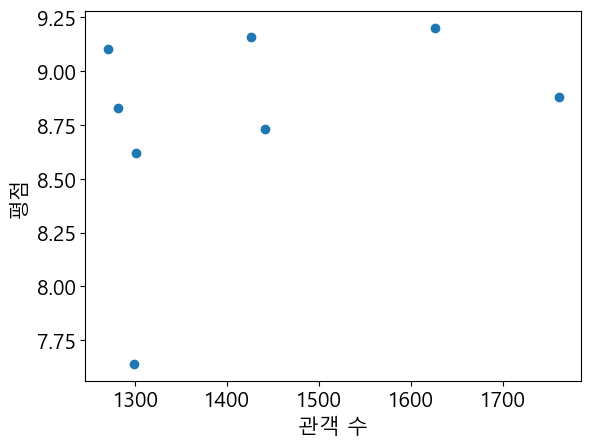

In [58]:
plt.scatter(df['관객 수'], df['평점'])
plt.xlabel('관객 수')
plt.ylabel('평점')

## 7. 앞에서 만든 그래프에 제시된 세부 사항을 적용하시오.

- 원의 크기 : 랜덤(sizes=np.random.rand(8) * 1000) 이용
- colormap : 'viridis'
- 투명도 : 0.3
- colorbar : 아래쪽에 위치, 이름은 영화분포

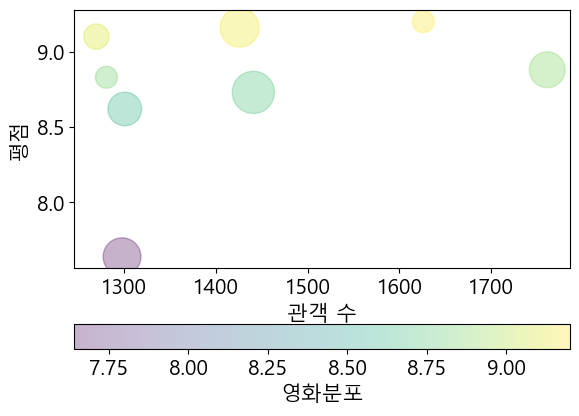

In [65]:
import numpy as np
sizes=np.random.rand(8) * 1000

plt.scatter(df['관객 수'], df['평점'], s=sizes, c=df['평점'], cmap='viridis', alpha=0.3)
plt.xlabel('관객 수')
plt.ylabel('평점')
plt.colorbar(orientation='horizontal' , label='영화분포')

## 8 ~ 9. 4개의 그래프를 조건에 따라 그리시오.

- 전체 그래프 제목 : 영화 분석 그래프
- 첫 번째 막대 그래프
x축 : 영화, y축 : 관객 수
그래프 제목 : 관객수, 범례 : 관객 수, 그래프 색상 : 'lightblue', 격자 생성 : '--', width : 0.5
- 두 번째 꺽은 선 그래프
x축 : 영화, y축 : 평점
x축 : 영화, y축 : 관객수
범례 : 평점, 관객 수
- 세 번째 가로 막대형 그래프
x축 : 영화, y축 : 개봉 연도
- 네 번째 꺽은 선 그래프
x축 : 영화, y축 : 관객 수

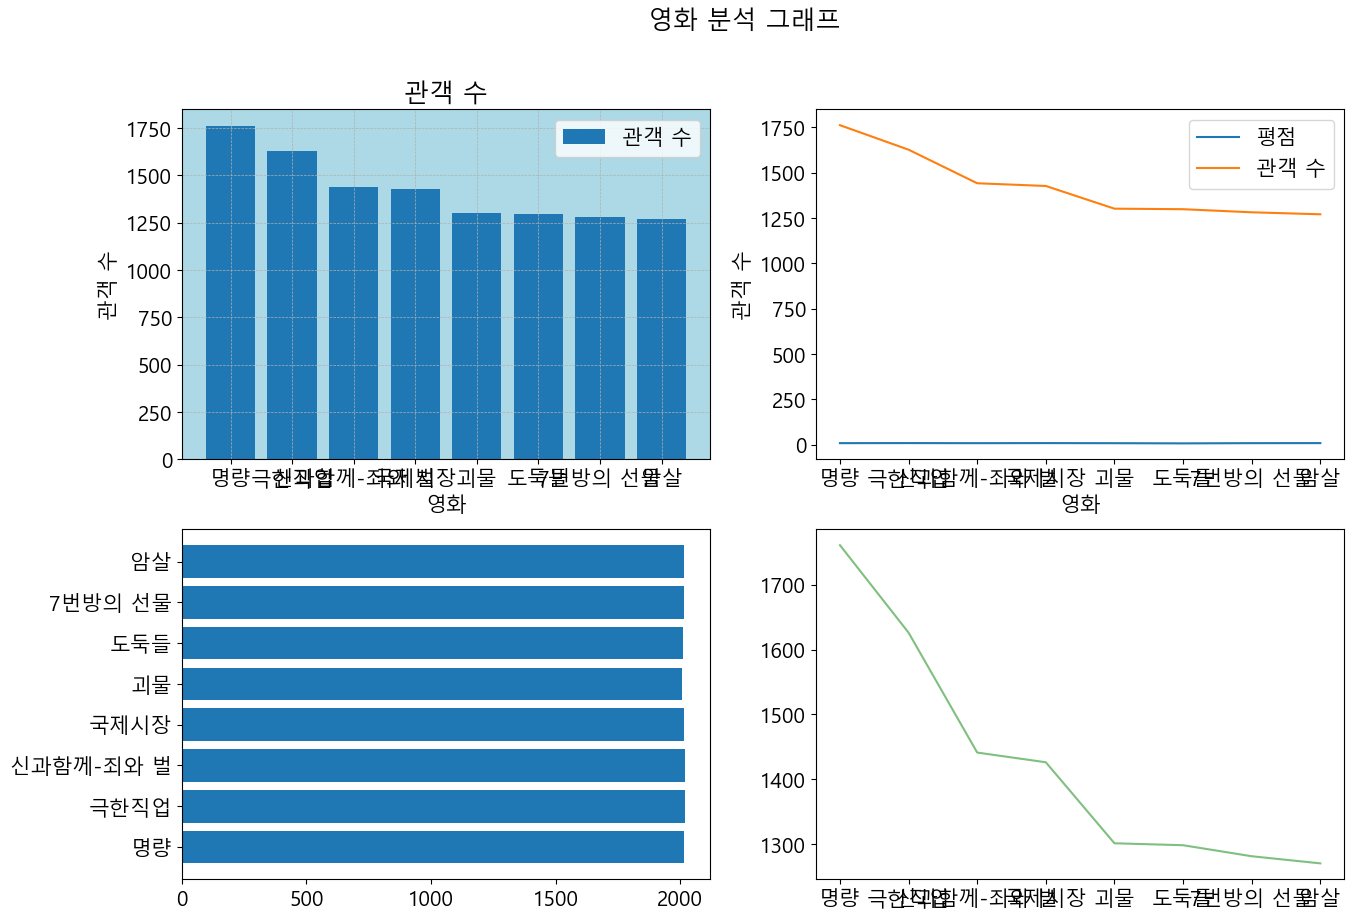

In [101]:
fig, axs = plt.subplots(2,2, figsize=(15,10))
fig.suptitle('영화 분석 그래프')

axs[0,0].bar(df['영화'],df['관객 수'], label='관객 수')
axs[0,0].legend()
axs[0,0].set(xlabel='영화',ylabel='관객 수')
axs[0,0].set_title('관객 수')
axs[0,0].set_facecolor('lightblue')
axs[0,0].grid(linestyle='--', linewidth=0.5)

axs[0,1].plot(df['영화'],df['평점'], label='평점')
axs[0,1].plot(df['영화'],df['관객 수'], label='관객 수')
axs[0,1].set_xlabel('영화')
axs[0,1].set_ylabel('관객 수')
axs[0,1].legend()

axs[1,0].barh(df['영화'],df['개봉 연도'])

axs[1,1].plot(df['영화'],df['관객 수'], color='green',alpha=.5)

## 10. 1번의 그래프를 movie.png 파일로 저장하고 확인하시오.

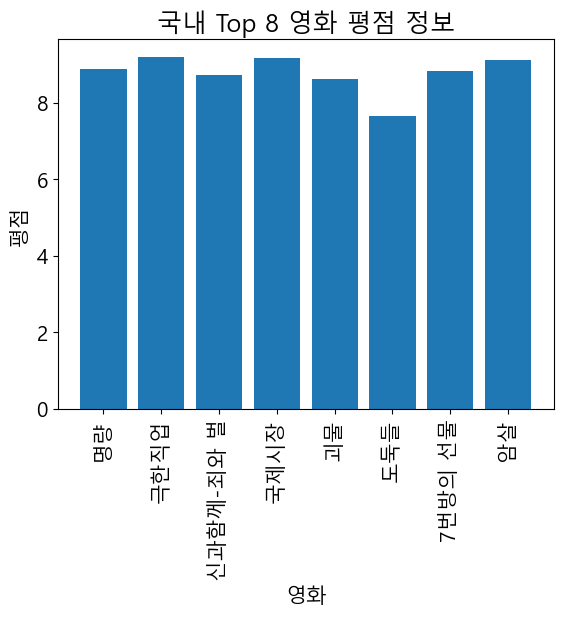

In [105]:
plt.bar(df['영화'], df['평점'])
plt.title('국내 Top 8 영화 평점 정보')
plt.xlabel('영화')
plt.xticks(rotation=90)
plt.ylabel('평점')

plt.savefig('movie.png')